In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#Aprendizaje no supervisado
Encontrar un patrón dentro de datos sin etiqueta

**Kmean**: 

Es un algoritmo de agrupamiento cuyo propósito es separar n observaciones en k clusters. Cada observación pertenece al grupo cuyo valor medio sea el más acercado.Agrupa el conjunto de datos según su media.



El algoritmo tiene tres pasos/fases:


● Fase de creación: se crean k puntos (cluster centroids) en el espacio dado por el conjunto de entrada (el tamaño de cada muestra) con coordenadas al azar.

● Asignación de Clases: Las muestras se asignan a el centroide más cercano.

● Movimiento del Centroide: Se halla la media de cada conjunto de muestras asignadas a cada centroide, y se asigna las coordenadas del centroide.


In [0]:
from copy import deepcopy
from numpy.linalg import norm

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/adrishg/PythonML-PrebecariosProteco/master/DataSets/kmeans.csv', header = 0)
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


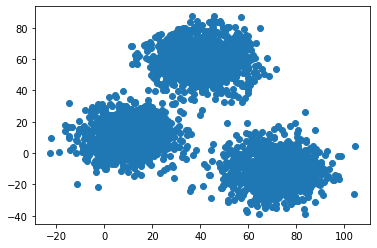

In [0]:
eje1 = data.iloc[:,0].values
eje2 = data.iloc[:,1].values

x= data.values

plt.scatter(eje1, eje2)

**Requerimientos**
Las funciones que necesitaremos serían:

1) Función de costo: en este caso corresponde a la suma de las distancias al cuadrado de cada punto a su centroide asignado

2) Función que inicialice los centroides de con coordenadas aleatorias

3) Función kMean: es iterativa, evalue de cada punto cada valor asignado.

4) Mejor inicio 

P.S. En parte por esto no está tan optimizado el algoritmo, más que mover los puntos con una minimización


In [0]:
#Función de costo para kMean, es 
def funcion_de_costo(x, M):
  distancias = np.linalg.norm(x - M, axis= 1)
  distanciasAlCuadrado= distancias**2
  sumatoriaDistanciasAlCuadrado= np.sum(distanciasAlCuadrado)
  return sumatoriaDistanciasAlCuadrado / len(x)


In [0]:
def distancia(x, M, ax = 1):
  return np.linalg.norm(x - M, axis= ax)

In [0]:
#Asignacion aleatoria de las coordinadas de los centriolos(inicialmente)
def centroides_aleatorios(x,k):
  xy_centroidesAleatorios= np.random.randint(0, len(x), size=k)
  return x[xy_centroidesAleatorios]

In [0]:
def kMean(x, k, centroides_inicio= None, numeroDeIteraciones= 1000, E=.0001):
  if centroides_inicio is None:
    centroides_inicio = centroides_aleatorios(x,k)

  n= len(x)
  M= deepcopy(centroides_inicio)
  C= np.zeros(n)

  i=0

  costoAnterior=1
  costo= funcion_de_costo(x, M[C.astype(int)])

  while i < numeroDeIteraciones and abs(costoAnterior -costo)> E:
    puntos = [[] for j in range(k)]

    costoAnterior = costo

    for j in range(n):
      distancias= distancia(x[j], M)
      clase = np.argmin(distancias)
      C[j]= clase
      puntos[clase].append(x[j])

    for j in range(k):
      M[j]= np.mean(puntos[j],axis= 0)
    i = i+1

    return centroides_inicio, M, costo, puntos



In [0]:
def mejor_inicio(x, k, tamanio=100):
  inicios= []
  costos= []
  n= len(x)

  for i in range(tamanio):
    indices_aleatorios, M, costo, puntos = kMean(x,k)
    inicios.append(indices_aleatorios)
    costos.append(costo)

  MenorCosto= np.argmin(costos)
  print ("El menor costo es"+str(costos[MenorCosto])+"y los centroides son:"+str(inicios[MenorCosto]))
  return inicios[MenorCosto], M, costos[MenorCosto], puntos

El menor costo es1882.8949283994802y los centroides son:[[ 29.06922  31.39812]
 [ 39.12633  60.63593]
 [ 67.71612 -21.95391]]


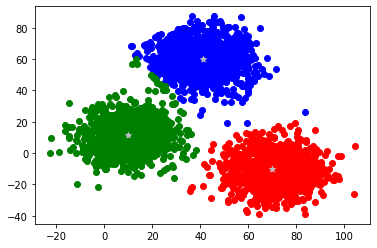

In [0]:
#Hay varias formas de estimar cuandos centroides hacen el óptimo, es esté caso tomamos 3 por inspección visual de la gráfica
k=3
centroides_inicio, M, costo, puntos = mejor_inicio(x, k,)

colores = ['b','g','r']
figura, ax = plt.subplots()
for i in range(k):
  puntos[i] = np.array(puntos[i])
  ax.scatter(puntos[i][:,0], puntos[i][:,1],c=colores[i])
ax.scatter(M[:,0], M[:,1], marker="*",c="silver")